# Genre Section

In [245]:
# immport modules
import os
import pandas as pd
import numpy as np
import requests
import datetime
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime as dt
%matplotlib inline

plt.style.use("fivethirtyeight")

In [246]:
# read file
df = pd.read_csv('All_Movies_Working.csv')   #All_Movies_Working.csv
genre_df = df
genre_df.head()

,Title,Metascore,Rated,Runtime,Released,Genre,Box Office,imdb_rating,imdb_votes,imdb_source,imdb_score,rotten_source,rotten_score,metacrit_source,metacrit_score,release_month,release_year
0,Beowulf,59.0,PG-13,115 min,16 Nov 2007,"Animation, Action, Adventure, Fantasy",82200000.0,6.2,"155,920",Internet Movie Database,6.2,Rotten Tomatoes,7.1,Metacritic,5.9,11,2007
1,But I'm a Cheerleader,39.0,R,85 min,11 Aug 2000,"Comedy, Drama, Romance",175182.0,6.6,"23,614",Internet Movie Database,6.6,Rotten Tomatoes,3.9,Metacritic,3.9,8,2000
2,Flawless,57.0,PG-13,108 min,28 Mar 2008,"Crime, Drama, Thriller",1146525.0,6.8,"21,901",Internet Movie Database,6.8,Rotten Tomatoes,5.5,Metacritic,5.7,3,2008
3,Gloria,83.0,R,110 min,09 May 2013,"Comedy, Drama, Romance",1587655.0,6.8,"7,804",Internet Movie Database,6.8,Rotten Tomatoes,9.9,Metacritic,8.3,5,2013
4,Life,54.0,R,104 min,24 Mar 2017,"Horror, Sci-Fi, Thriller",30180466.0,6.6,"185,922",Internet Movie Database,6.6,Rotten Tomatoes,6.8,Metacritic,5.4,3,2017


In [247]:
# create discrete genre columns
comedy = genre_df["Genre"].str.contains("Comedy", case=True, regex=True)
action = genre_df["Genre"].str.contains("Action", case=True, regex=True)
drama = genre_df["Genre"].str.contains("Drama", case=True, regex=True)
romance = genre_df["Genre"].str.contains("Romance", case=True, regex=True)
thriller = genre_df["Genre"].str.contains("Thriller", case=True, regex=True)
adventure = genre_df["Genre"].str.contains("Adventure", case=True, regex=True)
crime = genre_df["Genre"].str.contains("Crime", case=True, regex=True)
fantasy = genre_df["Genre"].str.contains("Fantasy", case=True, regex=True)
family = genre_df["Genre"].str.contains("Family", case=True, regex=True)
scifi = genre_df["Genre"].str.contains("Sci-Fi", case=True, regex=True)

In [248]:
# add columns to dataframe
genre_df["comedy"] = comedy
genre_df["action"] = action
genre_df["drama"] = drama
genre_df["romance"] = romance
genre_df["thriller"] = thriller
genre_df["adventure"] = adventure
genre_df["crime"] = crime
genre_df["fantasy"] = fantasy
genre_df["family"] = family
genre_df["scifi"] = scifi
genre_df["Box Office"] = genre_df["Box Office"] / 1000000
genre_df.head()

,Title,Metascore,Rated,Runtime,Released,Genre,Box Office,imdb_rating,imdb_votes,imdb_source,...,comedy,action,drama,romance,thriller,adventure,crime,fantasy,family,scifi
0,Beowulf,59.0,PG-13,115 min,16 Nov 2007,"Animation, Action, Adventure, Fantasy",82.200000,6.2,"155,920",Internet Movie Database,...,False,True,False,False,False,True,False,True,False,False
1,But I'm a Cheerleader,39.0,R,85 min,11 Aug 2000,"Comedy, Drama, Romance",0.175182,6.6,"23,614",Internet Movie Database,...,True,False,True,True,False,False,False,False,False,False
2,Flawless,57.0,PG-13,108 min,28 Mar 2008,"Crime, Drama, Thriller",1.146525,6.8,"21,901",Internet Movie Database,...,False,False,True,False,True,False,True,False,False,False
3,Gloria,83.0,R,110 min,09 May 2013,"Comedy, Drama, Romance",1.587655,6.8,"7,804",Internet Movie Database,...,True,False,True,True,False,False,False,False,False,False
4,Life,54.0,R,104 min,24 Mar 2017,"Horror, Sci-Fi, Thriller",30.180466,6.6,"185,922",Internet Movie Database,...,False,False,False,False,True,False,False,False,False,True


In [249]:
# setup loc tables filtered by each genre
comedy_loc = genre_df.loc[genre_df["comedy"] == True]
action_loc = genre_df.loc[genre_df["action"] == True]
drama_loc = genre_df.loc[genre_df["drama"] == True]
romance_loc = genre_df.loc[genre_df["romance"] == True]
thriller_loc = genre_df.loc[genre_df["thriller"] == True]
adventure_loc = genre_df.loc[genre_df["adventure"] == True]
crime_loc = genre_df.loc[genre_df["crime"] == True]
fantasy_loc = genre_df.loc[genre_df["fantasy"] == True]
family_loc = genre_df.loc[genre_df["family"] == True]
scifi_loc = genre_df.loc[genre_df["scifi"] == True]

# test one
comedy_loc


,Title,Metascore,Rated,Runtime,Released,Genre,Box Office,imdb_rating,imdb_votes,imdb_source,...,comedy,action,drama,romance,thriller,adventure,crime,fantasy,family,scifi
1,But I'm a Cheerleader,39.0,R,85 min,11 Aug 2000,"Comedy, Drama, Romance",0.175182,6.6,"23,614",Internet Movie Database,...,True,False,True,True,False,False,False,False,False,False
3,Gloria,83.0,R,110 min,09 May 2013,"Comedy, Drama, Romance",1.587655,6.8,"7,804",Internet Movie Database,...,True,False,True,True,False,False,False,False,False,False
5,102 Dalmatians,35.0,G,100 min,22 Nov 2000,"Adventure, Comedy, Family",65.406212,4.9,"32,329",Internet Movie Database,...,True,False,False,False,False,True,False,False,True,False
8,Almost Famous,90.0,R,122 min,22 Sep 2000,"Adventure, Comedy, Drama, Music",31.716715,7.9,"237,103",Internet Movie Database,...,True,False,True,False,False,True,False,False,False,False
10,Bamboozled,50.0,R,135 min,20 Oct 2000,"Comedy, Drama, Music",1.883628,6.5,"9,498",Internet Movie Database,...,True,False,True,False,False,False,False,False,False,False
11,Beautiful,23.0,PG-13,112 min,29 Sep 2000,"Drama, Comedy",2.834122,5.5,"3,521",Internet Movie Database,...,True,False,True,False,False,False,False,False,False,False
13,Best in Show,78.0,PG-13,90 min,20 Oct 2000,Comedy,16.574225,7.5,"51,513",Internet Movie Database,...,True,False,False,False,False,False,False,False,False,False
14,Big Momma's House,33.0,PG-13,99 min,02 Jun 2000,"Action, Comedy, Crime",0.492734,5.1,"76,719",Internet Movie Database,...,True,True,False,False,False,False,True,False,False,False
16,Bring It On,52.0,PG-13,98 min,25 Aug 2000,"Comedy, Romance, Sport",67.905760,6.0,"81,928",Internet Movie Database,...,True,False,False,True,False,False,False,False,False,False
17,Charlie's Angels,52.0,PG-13,98 min,03 Nov 2000,"Action, Adventure, Comedy, Crime, Thriller",124.420707,5.5,"164,922",Internet Movie Database,...,True,True,False,False,True,True,True,False,False,False


In [250]:
# get counts
comedy_count = comedy_loc["Title"].count()
action_count = action_loc["Title"].count()
drama_count = drama_loc["Title"].count()
romance_count = romance_loc["Title"].count()
thriller_count = thriller_loc["Title"].count()
adventure_count = adventure_loc["Title"].count()
crime_count = crime_loc["Title"].count()
fantasy_count = fantasy_loc["Title"].count()
family_count = family_loc["Title"].count()
scifi_count = scifi_loc["Title"].count()

# test one
comedy_count

1173

In [251]:
# total movie count
total_movies = genre_df["Title"].count()
total_movies

2792

In [252]:
# get average ratings
comedy_critic = comedy_loc["imdb_rating"].mean()
action_critic = action_loc["imdb_rating"].mean()
drama_critic = drama_loc["imdb_rating"].mean()
romance_critic = romance_loc["imdb_rating"].mean()
thriller_critic = thriller_loc["imdb_rating"].mean()
adventure_critic = adventure_loc["imdb_rating"].mean()
crime_critic = crime_loc["imdb_rating"].mean()
fantasy_critic = fantasy_loc["imdb_rating"].mean()
family_critic = family_loc["imdb_rating"].mean()
scifi_critic = scifi_loc["imdb_rating"].mean()

# test one
comedy_critic

6.048849104859338

In [253]:
# get stats for each genre
# comedy
(comedy_slope, comedy_intercept, comedy_rvalue, comedy_pvalue, comedy_stderr) = linregress(comedy_loc["imdb_rating"], 
                                                                            comedy_loc["Box Office"])
comedy_regress = comedy_loc["imdb_rating"] * comedy_slope + comedy_intercept
comedy_rvalue = round(comedy_rvalue,2)

# action
(action_slope, action_intercept, action_rvalue, action_pvalue, action_stderr) = linregress(action_loc["imdb_rating"], 
                                                                                           action_loc["Box Office"])
action_regress = action_loc["imdb_rating"] * action_slope + action_intercept
action_rvalue = round(action_rvalue,2)

# drama
(drama_slope, drama_intercept, drama_rvalue, drama_pvalue, drama_stderr) = linregress(drama_loc["imdb_rating"], 
                                                                                           drama_loc["Box Office"])
drama_regress = drama_loc["imdb_rating"] * drama_slope + drama_intercept
drama_rvalue = round(drama_rvalue,2)

# romance
(romance_slope, romance_intercept, romance_rvalue, romance_pvalue, romance_stderr) = linregress(romance_loc["imdb_rating"], 
                                                                                           romance_loc["Box Office"])
romance_regress = romance_loc["imdb_rating"] * romance_slope + romance_intercept
romance_rvalue = round(romance_rvalue,2)

# thriller
(thriller_slope, thriller_intercept, thriller_rvalue, thriller_pvalue, thriller_stderr) = linregress(thriller_loc["imdb_rating"], 
                                                                                           thriller_loc["Box Office"])
thriller_regress = thriller_loc["imdb_rating"] * thriller_slope + thriller_intercept
thriller_rvalue = round(thriller_rvalue,2)

# adventure
(adventure_slope, adventure_intercept, adventure_rvalue, adventure_pvalue, adventure_stderr) = linregress(adventure_loc["imdb_rating"], 
                                                                                           adventure_loc["Box Office"])
adventure_regress = adventure_loc["imdb_rating"] * adventure_slope + adventure_intercept
adventure_rvalue = round(adventure_rvalue,2)

# crime
(crime_slope, crime_intercept, crime_rvalue, crime_pvalue, crime_stderr) = linregress(crime_loc["imdb_rating"], 
                                                                                           crime_loc["Box Office"])
crime_regress = crime_loc["imdb_rating"] * crime_slope + crime_intercept
crime_rvalue = round(crime_rvalue,2)

# fantasy
(fantasy_slope, fantasy_intercept, fantasy_rvalue, fantasy_pvalue, fantasy_stderr) = linregress(fantasy_loc["imdb_rating"], 
                                                                                           fantasy_loc["Box Office"])
fantasy_regress = fantasy_loc["imdb_rating"] * fantasy_slope + fantasy_intercept
fantasy_rvalue = round(fantasy_rvalue,2)

# family
(family_slope, family_intercept, family_rvalue, family_pvalue, family_stderr) = linregress(family_loc["imdb_rating"], 
                                                                                           family_loc["Box Office"])
family_regress = family_loc["imdb_rating"] * family_slope + family_intercept
family_rvalue = round(family_rvalue,2)

# scifi
(scifi_slope, scifi_intercept, scifi_rvalue, scifi_pvalue, scifi_stderr) = linregress(scifi_loc["imdb_rating"], 
                                                                                           scifi_loc["Box Office"])
family_scifi = scifi_loc["imdb_rating"] * scifi_slope + scifi_intercept
scifi_rvalue = round(scifi_rvalue,2)


In [254]:
# genre summary table lists
genre_list = ["comedy", "action", "drama", "romance", "thriller", "adventure", "crime", "fantasy", "family", "scifi"]
genre_count_list = [comedy_count,action_count,drama_count,romance_count,thriller_count,adventure_count,crime_count,
                    fantasy_count,family_count,scifi_count]
genre_perc_films = (genre_count_list / total_movies) * 100
genre_r_list = [comedy_rvalue,action_rvalue,drama_rvalue,romance_rvalue,thriller_rvalue,adventure_rvalue,crime_rvalue,
                    fantasy_rvalue,family_rvalue,scifi_rvalue]

# genre summary dataframe
genre_summary = pd.DataFrame({"Genre" : genre_list,
                              "Movie Count" : genre_count_list,
                              "Percent of Movies" : genre_perc_films,
                              "R-Sq Rating to Box Office" : genre_r_list})


# table formating and sorting
genre_summary = genre_summary.sort_values(by="R-Sq Rating to Box Office")
genre_summary["Percent of Movies"] = round(genre_summary["Percent of Movies"],2)
genre_summary

,Genre,Movie Count,Percent of Movies,R-Sq Rating to Box Office
3,romance,630,22.56,0.03
2,drama,1424,51.00,0.22
6,crime,492,17.62,0.24
0,comedy,1173,42.01,0.25
4,thriller,808,28.94,0.34
7,fantasy,382,13.68,0.41
1,action,659,23.60,0.44
5,adventure,558,19.99,0.44
9,scifi,336,12.03,0.44
8,family,362,12.97,0.47


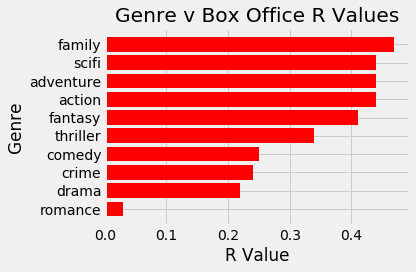

In [255]:
# plot all r squared values
plt.barh(genre_summary["Genre"], genre_summary["R-Sq Rating to Box Office"], color="red")

# format chart
plt.title("Genre v Box Office R Values")
plt.xlabel("R Value")
plt.ylabel("Genre")

plt.tight_layout()
plt.show()

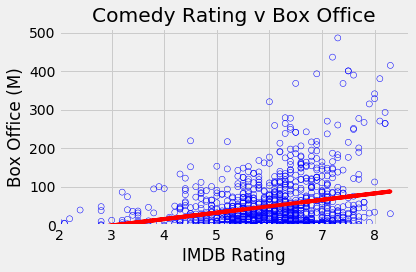

R-squared is 0.25


In [256]:
# plot comedy
plt.scatter(comedy_loc["imdb_rating"], comedy_loc["Box Office"], color="none",edgecolors="blue")
plt.plot(comedy_loc["imdb_rating"],comedy_regress,color="red")

# format chart
plt.title("Comedy Rating v Box Office")
plt.xlabel("IMDB Rating")
plt.ylabel("Box Office (M)")
plt.ylim(bottom=0)
plt.xlim(left=2)
plt.tight_layout()
plt.show()
print(f"R-squared is {comedy_rvalue}")

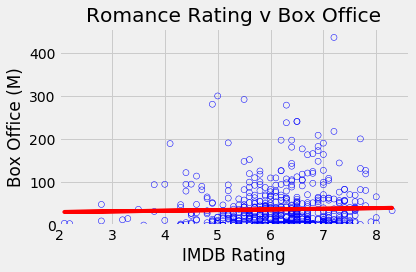

R-squared is 0.03


In [257]:
# plot romance
plt.scatter(romance_loc["imdb_rating"], romance_loc["Box Office"], color="none",edgecolors="blue")
plt.plot(romance_loc["imdb_rating"],romance_regress,color="red")

# format chart
plt.title("Romance Rating v Box Office")
plt.xlabel("IMDB Rating")
plt.ylabel("Box Office (M)")
plt.ylim(bottom=0)
plt.xlim(left=2)
plt.tight_layout()
plt.show()
print(f"R-squared is {romance_rvalue}")

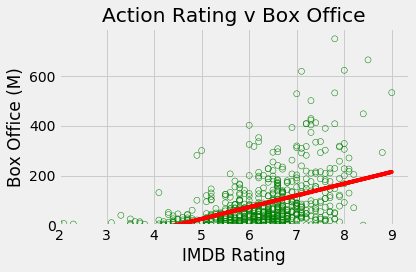

R-squared is 0.44


In [258]:
# plot action
plt.scatter(action_loc["imdb_rating"], action_loc["Box Office"], color="none",edgecolors="green")
plt.plot(action_loc["imdb_rating"],action_regress,color="red")

# format chart
plt.title("Action Rating v Box Office")
plt.xlabel("IMDB Rating")
plt.ylabel("Box Office (M)")
plt.ylim(bottom=0)
plt.xlim(left=2)
plt.tight_layout()
plt.show()
print(f"R-squared is {action_rvalue}")

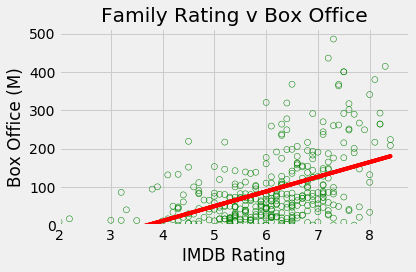

R-squared is 0.47


In [259]:
# plot family
plt.scatter(family_loc["imdb_rating"], family_loc["Box Office"], color="none",edgecolors="green")
plt.plot(family_loc["imdb_rating"],family_regress,color="red")

# format chart
plt.title("Family Rating v Box Office")
plt.xlabel("IMDB Rating")
plt.ylabel("Box Office (M)")
plt.ylim(bottom=0)
plt.xlim(left=2)
plt.tight_layout()
plt.show()
print(f"R-squared is {family_rvalue}")

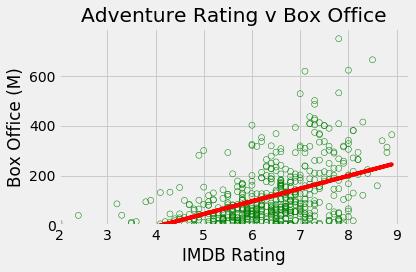

R-squared is 0.44


In [260]:
# plot adventure
plt.scatter(adventure_loc["imdb_rating"], adventure_loc["Box Office"], color="none",edgecolors="green")
plt.plot(adventure_loc["imdb_rating"],adventure_regress,color="red")

# format chart
plt.title("Adventure Rating v Box Office")
plt.xlabel("IMDB Rating")
plt.ylabel("Box Office (M)")
plt.ylim(bottom=0)
plt.xlim(left=2)
plt.tight_layout()
plt.show()
print(f"R-squared is {adventure_rvalue}")

# Census Section
---
* Source: Box Office Mojo, an IMDB company 
* Source: Organisation for Economic Co-operation and Development 
* Source: Bureau of Labor Statistics


In [261]:
# import economic indicators table
economic_df = pd.read_csv("Economy_Indicators.csv")
economic_df = economic_df.sort_values(by="Year")
economic_df

,Year,Total Gross (M),YOY Box Office Change,Tickets Sold (M),YOY Ticket Change,Unemployment,DPI,Median HH Income
19,1998,6949.0,9.2%,1480.7,6.7%,4.5,5.7,5.1
18,1999,7448.0,7.2%,1465.2,-1.1%,4.2,3.2,4.7
17,2000,7661.0,2.9%,1420.8,-3.0%,4.0,4.7,3.2
16,2001,8412.5,9.8%,1487.3,4.7%,4.7,2.8,0.6
15,2002,9155.1,8.8%,1575.7,6.0%,5.8,3.4,0.4
14,2003,9239.7,0.9%,1532.3,-2.8%,6.0,2.6,2.1
13,2004,9380.5,1.5%,1510.5,-1.4%,5.5,3.1,2.3
12,2005,8840.5,-5.8%,1379.2,-8.7%,5.1,1.3,4.5
11,2006,9209.5,4.2%,1406.0,2.0%,4.6,3.6,4.0
10,2007,9663.8,4.9%,1404.6,-0.1%,4.6,2.1,4.2


In [262]:
# change volues to floats
economic_df['YOY Box Office Change'] = economic_df['YOY Box Office Change'].str.replace('%', '').astype(float)
economic_df['YOY Ticket Change'] = economic_df['YOY Ticket Change'].str.replace('%', '').astype(float)
economic_df['Year'] = pd.to_datetime(economic_df['Year'], format="%Y")
# economic_df['Year'] = np.datetime64(economic_df['Year'], 'Y')
economic_df.dtypes
economic_df.head()

,Year,Total Gross (M),YOY Box Office Change,Tickets Sold (M),YOY Ticket Change,Unemployment,DPI,Median HH Income
19,1998-01-01,6949.0,9.2,1480.7,6.7,4.5,5.7,5.1
18,1999-01-01,7448.0,7.2,1465.2,-1.1,4.2,3.2,4.7
17,2000-01-01,7661.0,2.9,1420.8,-3.0,4.0,4.7,3.2
16,2001-01-01,8412.5,9.8,1487.3,4.7,4.7,2.8,0.6
15,2002-01-01,9155.1,8.8,1575.7,6.0,5.8,3.4,0.4


<function matplotlib.pyplot.show(*args, **kw)>

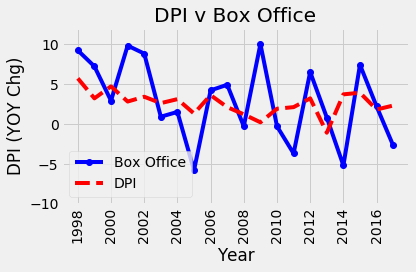

In [263]:
# compare move measures to economy measures
plt.plot(economic_df["Year"], economic_df["YOY Box Office Change"], color="blue",marker="o", label="Box Office")
# plt.plot(economic_df["Year"], economic_df["YOY Ticket Change"], color="green", marker="o", label="Tickets") ##removed
plt.plot(economic_df["Year"], economic_df["DPI"], color="red", linestyle="--", label="DPI")

# format chart
plt.legend(loc="best")
plt.title("DPI v Box Office")
plt.xlabel("Year")
plt.xticks(rotation="vertical")
plt.ylabel("DPI (YOY Chg)")
plt.ylim(bottom=-10, top=12)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

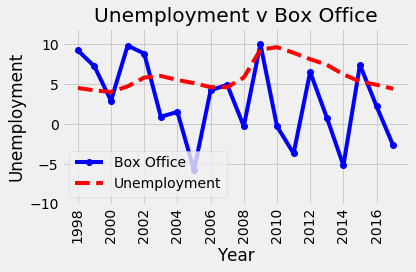

In [264]:
# compare move measures to economy measures
plt.plot(economic_df["Year"], economic_df["YOY Box Office Change"], color="blue",marker="o", label="Box Office")
plt.plot(economic_df["Year"], economic_df["Unemployment"], color="red", linestyle="--", label="Unemployment")

# format chart
plt.legend(loc="best")
plt.title("Unemployment v Box Office")
plt.xlabel("Year")
plt.xticks(rotation="vertical")
plt.ylabel("Unemployment")
plt.ylim(bottom=-10, top=12)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

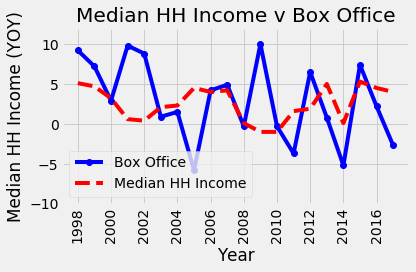

In [265]:
# compare move measures to economy measures
plt.plot(economic_df["Year"], economic_df["YOY Box Office Change"], color="blue",marker="o", label="Box Office")
plt.plot(economic_df["Year"], economic_df["Median HH Income"], color="red", linestyle="--", label="Median HH Income")

# format chart
plt.legend(loc="best")
plt.title("Median HH Income v Box Office")
plt.xlabel("Year")
plt.xticks(rotation="vertical")
plt.ylabel("Median HH Income (YOY)")
plt.ylim(bottom=-10, top=12)
plt.tight_layout()
plt.show